In [1]:
#Packages and libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', '{:.0f}'.format)
             
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Uploading the dataset
df0 = pd.read_csv('OneDrive/Escritorio/CABAm2ValueAnalysis.csv')
df0.head()

,Commune,($) One Room,($) Two Rooms,($)Three Rooms,% of apartments for rent,% of apartments for sell,M2 Value(us$),Total family income(ARS$)(AVG)(Monthly),Income vs Two Rooms (%),Public transport,Green spaces Area per citizen (Ha/1000 citizen),Hospital,Sport Clubs,Education(q),SMEs(Pymes),Robberies & thefts(per day),Rob & thefts(%),Population,Area(Km2),People under the line of poverty(%)
0,1,283558,355582,557331,9,9,1696,989358,64,Both,2,Yes,17,229,16022,49,14,223282,17,36
1,2,317042,417649,643136,9,7,2453,1131379,63,Subway,0,Yes,9,138,6157,18,5,158368,6,11
2,3,270472,355297,499327,6,7,1481,856785,59,Both,0,Yes,8,195,12544,28,8,195462,6,22
3,4,253604,335419,521508,3,3,1347,793689,58,Both,0,Yes,10,241,10537,30,8,230945,22,41
4,5,288956,374405,599377,6,7,1599,980557,62,Both,0,No,17,158,7280,18,5,193859,7,11


In [3]:
# A copy of the dataset in order to manipulate it as we need without change the original dataset.
df1 = df0.copy()


In [4]:
##Null datapoints count
df1.isna().sum()

Commune                                            0
($) One Room                                       1
($) Two Rooms                                      1
($)Three Rooms                                     1
% of apartments for rent                           0
% of apartments for sell                           0
M2 Value(us$)                                      0
Total family income(ARS$)(AVG)(Monthly)            0
Income vs Two Rooms (%)                            1
Public transport                                   0
Green spaces Area per citizen (Ha/1000 citizen)    0
Hospital                                           0
Sport Clubs                                        0
Education(q)                                       0
SMEs(Pymes)                                        0
Robberies & thefts(per day)                        0
Rob & thefts(%)                                    0
Population                                         0
Area(Km2)                                     

In [5]:
df1.head()

,Commune,($) One Room,($) Two Rooms,($)Three Rooms,% of apartments for rent,% of apartments for sell,M2 Value(us$),Total family income(ARS$)(AVG)(Monthly),Income vs Two Rooms (%),Public transport,Green spaces Area per citizen (Ha/1000 citizen),Hospital,Sport Clubs,Education(q),SMEs(Pymes),Robberies & thefts(per day),Rob & thefts(%),Population,Area(Km2),People under the line of poverty(%)
0,1,283558,355582,557331,9,9,1696,989358,64,Both,2,Yes,17,229,16022,49,14,223282,17,36
1,2,317042,417649,643136,9,7,2453,1131379,63,Subway,0,Yes,9,138,6157,18,5,158368,6,11
2,3,270472,355297,499327,6,7,1481,856785,59,Both,0,Yes,8,195,12544,28,8,195462,6,22
3,4,253604,335419,521508,3,3,1347,793689,58,Both,0,Yes,10,241,10537,30,8,230945,22,41
4,5,288956,374405,599377,6,7,1599,980557,62,Both,0,No,17,158,7280,18,5,193859,7,11


In [6]:
##Metadata info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Commune                                          15 non-null     int64  
 1   ($) One Room                                     14 non-null     float64
 2   ($) Two Rooms                                    14 non-null     float64
 3   ($)Three Rooms                                   14 non-null     float64
 4   % of apartments for rent                         15 non-null     float64
 5   % of apartments for sell                         15 non-null     float64
 6   M2 Value(us$)                                    15 non-null     int64  
 7   Total family income(ARS$)(AVG)(Monthly)          15 non-null     float64
 8   Income vs Two Rooms (%)                          14 non-null     float64
 9   Public transport                  

In [7]:
#Statistic general information
df1.describe()

,Commune,($) One Room,($) Two Rooms,($)Three Rooms,% of apartments for rent,% of apartments for sell,M2 Value(us$),Total family income(ARS$)(AVG)(Monthly),Income vs Two Rooms (%),Green spaces Area per citizen (Ha/1000 citizen),Sport Clubs,Education(q),SMEs(Pymes),Robberies & thefts(per day),Rob & thefts(%),Population,Area(Km2),People under the line of poverty(%)
count,15,14,14,14,15,15,15,15,14,15,15,15,15,15,15,15,15,15
mean,8,282112,379912,581387,7,7,1757,1013964,63,1,20,184,9360,23,7,203635,14,21
std,4,27759,40425,65351,4,3,468,185268,3,1,13,33,2712,9,3,29585,5,14
min,1,240987,315581,483150,0,1,978,733485,56,0,7,138,5870,15,4,158368,6,8
25%,4,258240,355368,526498,5,5,1428,884396,62,0,11,156,7481,17,5,179325,10,12
50%,8,286257,371738,576168,6,7,1665,980557,64,0,17,182,9303,21,6,203491,14,16
75%,12,296617,411953,638023,9,9,2034,1123157,65,1,26,200,10652,27,8,224626,16,27
max,15,327685,452620,682630,14,12,2691,1388935,67,2,57,241,16022,49,14,265199,22,56


In [8]:
df1['M2 Value(us$)'].describe()

count     15
mean    1757
std      468
min      978
25%     1428
50%     1665
75%     2034
max     2691
Name: M2 Value(us$), dtype: float64

In [9]:
##This code removes any leading or trailing spaces
df1.columns = df1.columns.str.strip()


In [10]:
# One-Hot Encoding
df2 = pd.get_dummies(df1, columns=['Hospital'], drop_first=True)
# Reemplazar True con 1 y False con 0 en todo el DataFrame
df2 = df2.replace({True: 1, False: 0})
df2.head()

df2 = pd.get_dummies(df1, columns=['Public transport'], drop_first=False)
df2.head()

C:\Users\chan_\AppData\Local\Temp\ipykernel_23432\3450478053.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2 = df2.replace({True: 1, False: 0})


,Commune,($) One Room,($) Two Rooms,($)Three Rooms,% of apartments for rent,% of apartments for sell,M2 Value(us$),Total family income(ARS$)(AVG)(Monthly),Income vs Two Rooms (%),Green spaces Area per citizen (Ha/1000 citizen),...,SMEs(Pymes),Robberies & thefts(per day),Rob & thefts(%),Population,Area(Km2),People under the line of poverty(%),Public transport_Both,Public transport_Metrobus,Public transport_Neither,Public transport_Subway
0,1,283558,355582,557331,9,9,1696,989358,64,2,...,16022,49,14,223282,17,36,True,False,False,False
1,2,317042,417649,643136,9,7,2453,1131379,63,0,...,6157,18,5,158368,6,11,False,False,False,True
2,3,270472,355297,499327,6,7,1481,856785,59,0,...,12544,28,8,195462,6,22,True,False,False,False
3,4,253604,335419,521508,3,3,1347,793689,58,0,...,10537,30,8,230945,22,41,True,False,False,False
4,5,288956,374405,599377,6,7,1599,980557,62,0,...,7280,18,5,193859,7,11,True,False,False,False


In [11]:
print(df2.columns)

Index(['Commune', '($) One Room', '($) Two Rooms', '($)Three Rooms',
       '% of apartments for rent', '% of apartments for sell', 'M2 Value(us$)',
       'Total family income(ARS$)(AVG)(Monthly)', 'Income vs Two Rooms (%)',
       'Green spaces Area per citizen (Ha/1000 citizen)', 'Hospital',
       'Sport Clubs', 'Education(q)', 'SMEs(Pymes)',
       'Robberies & thefts(per day)', 'Rob & thefts(%)', 'Population',
       'Area(Km2)', 'People under the line of poverty(%)',
       'Public transport_Both', 'Public transport_Metrobus ',
       'Public transport_Neither', 'Public transport_Subway'],
      dtype='object')


In [12]:
##Rename columns generated by the One-Hot Encoding and replacing true or false with 1 or 0
df2 = df2.rename(columns={
    'Public transport_Both': 'Both',
    'Public transport_Metrobus ': 'Metrobus',
    'Public transport_Neither': 'Neither',
    'Public transport_Subway': 'Subway'
})
df2 = df2.replace({True: 1, False: 0})
df2.head()


C:\Users\chan_\AppData\Local\Temp\ipykernel_23432\1749082257.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2 = df2.replace({True: 1, False: 0})


,Commune,($) One Room,($) Two Rooms,($)Three Rooms,% of apartments for rent,% of apartments for sell,M2 Value(us$),Total family income(ARS$)(AVG)(Monthly),Income vs Two Rooms (%),Green spaces Area per citizen (Ha/1000 citizen),...,SMEs(Pymes),Robberies & thefts(per day),Rob & thefts(%),Population,Area(Km2),People under the line of poverty(%),Both,Metrobus,Neither,Subway
0,1,283558,355582,557331,9,9,1696,989358,64,2,...,16022,49,14,223282,17,36,1,0,0,0
1,2,317042,417649,643136,9,7,2453,1131379,63,0,...,6157,18,5,158368,6,11,0,0,0,1
2,3,270472,355297,499327,6,7,1481,856785,59,0,...,12544,28,8,195462,6,22,1,0,0,0
3,4,253604,335419,521508,3,3,1347,793689,58,0,...,10537,30,8,230945,22,41,1,0,0,0
4,5,288956,374405,599377,6,7,1599,980557,62,0,...,7280,18,5,193859,7,11,1,0,0,0


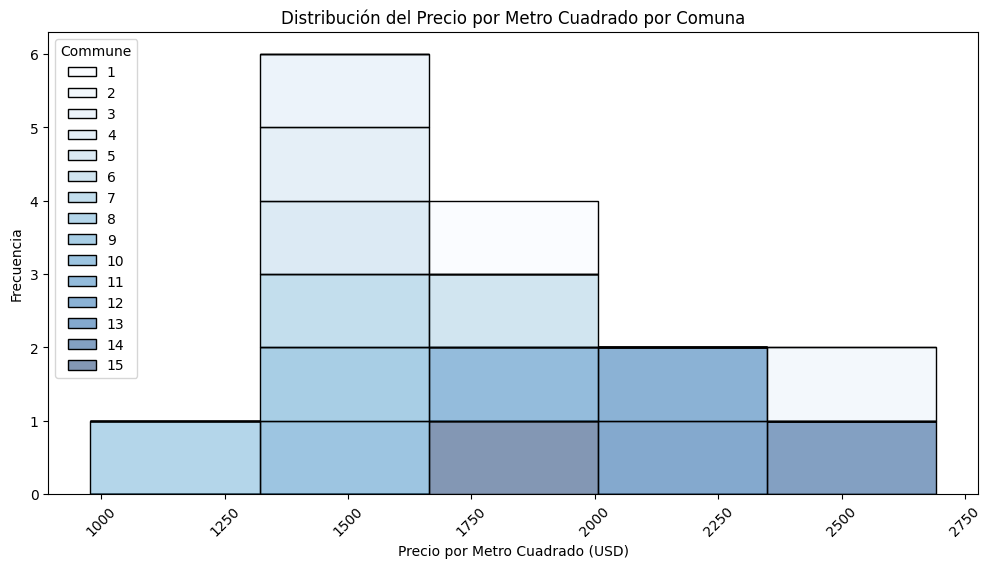

In [13]:
##Graph showing the price ditribution of the square meter by commune
#At the end it wasn't used
plt.figure(figsize=(12, 6))
sns.histplot(data=df2, x='M2 Value(us$)', hue='Commune', kde=True, multiple="stack", palette="Blues")
plt.title('Distribución del Precio por Metro Cuadrado por Comuna')
plt.xlabel('Precio por Metro Cuadrado (USD)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [14]:
##In order to help the normalization of the var'Total family income(ARS$)(AVG)(Monthly)' with M2 VALUE i convert pesos to
##dollars, without this the values were too far from each others making worse the results of the model.
# Price of the 'dólar MEP' used to made the exchange 
dolar_mep = 1161.80

# Converting pesos to dollars
df2['Total family income(USD)'] = df2['Total family income(ARS$)(AVG)(Monthly)'] / dolar_mep


In [15]:
## Replacing 'yes' with '1' and 'no' with '0' and converting all the data as Float data.
df2['Hospital'] = df2['Hospital'].replace({'Yes': 1, 'No': 0})
df2['Hospital'] = df2['Hospital'].astype(float)

C:\Users\chan_\AppData\Local\Temp\ipykernel_23432\3282290244.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Hospital'] = df2['Hospital'].replace({'Yes': 1, 'No': 0})


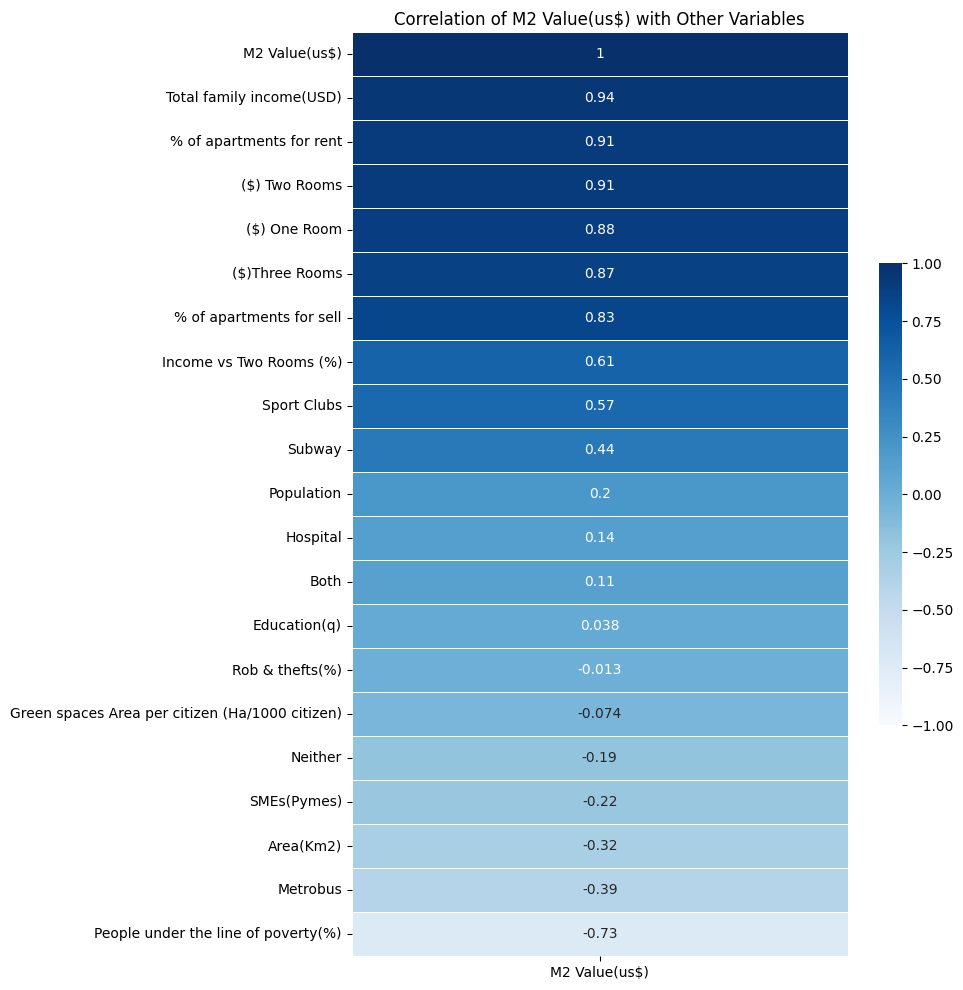

In [16]:
##Making of the corr heat map with the pearson method to learn about the relation of every var with the M2 value

# Selecting columns that could or should be relevant
columns_to_analyze = ['M2 Value(us$)', 'Total family income(USD)', '% of apartments for rent',
                      '($) Two Rooms', '($) One Room', '($)Three Rooms', '% of apartments for sell',
                      'Income vs Two Rooms (%)', 'Sport Clubs', 'Subway', 'Population', 'Hospital',
                      'Both', 'Education(q)', 'Rob & thefts(%)', 
                      'Green spaces Area per citizen (Ha/1000 citizen)', 'Neither', 'SMEs(Pymes)',
                      'Area(Km2)', 'Metrobus', 'People under the line of poverty(%)']

# Renaming
df_corr = df2[columns_to_analyze]

# Corr matrix calculation
corr_matrix = df_corr.corr()
#Extact the correlation respect the interest var'M2 Value(us$)
corr_m2_value = corr_matrix[['M2 Value(us$)']].sort_values(by='M2 Value(us$)', ascending=False)

# Viz of this
plt.figure(figsize=(8, 12))
sns.heatmap(corr_m2_value, annot=True, cmap='Blues', linewidths=0.5, cbar_kws={'shrink': 0.5}, vmin=-1, vmax=1)
plt.title('Correlation of M2 Value(us$) with Other Variables')
plt.show()

In [17]:
## Filling null data to go on with the model
#For this matter the null data comes from Commune 8 were we have the poorest of the communes in Buenos Aires, so i do,
#a research of random values of the rent of diferent apartments and conclude that in average they were 15% below the data of
#commune 9 the second poorest commune in Buenos aires. So i do this to calculate the estimation (Com9-(Com9*0.15).
df2['($) One Room'] = df2['($) One Room'].fillna(204839)
df2['($) Two Rooms'] = df2['($) Two Rooms'].fillna(268244)
df2['($)Three Rooms'] = df2['($)Three Rooms'].fillna(410678)
df2['Income vs Two Rooms (%)'] = df2['Income vs Two Rooms (%)'].fillna(54)

# Verify changes
print(df2[['($) One Room', '($) Two Rooms', '($)Three Rooms', 'Income vs Two Rooms (%)']].head(8))


   ($) One Room  ($) Two Rooms  ($)Three Rooms  Income vs Two Rooms (%)
0        283558         355582          557331                       64
1        317042         417649          643136                       63
2        270472         355297          499327                       59
3        253604         335419          521508                       58
4        288956         374405          599377                       62
5        298493         382021          584785                       66
6        265344         359154          541468                       62
7        204839         268244          410678                       54


In [18]:
##Linear Regression
#With the corr graph i select the relevant vars respect the M2 value
relevant_vars = ['Total family income(USD)', '% of apartments for rent',
                      '($) Two Rooms', '($) One Room', '($)Three Rooms', '% of apartments for sell',
                      'Income vs Two Rooms (%)', 'Sport Clubs', 'Subway',
                      'Metrobus', 'People under the line of poverty(%)']

# Features (X) y Target variable (y)
X = df2[relevant_vars]
y = df2['M2 Value(us$)']

# Train and test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation of this model
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))

R² Score: -16.056791151249087
Mean Squared Error (MSE): 1248447.1907284583
Root Mean Squared Error (RMSE): 1117.3393355326118
Mean Absolute Error (MAE): 1046.0973072332608


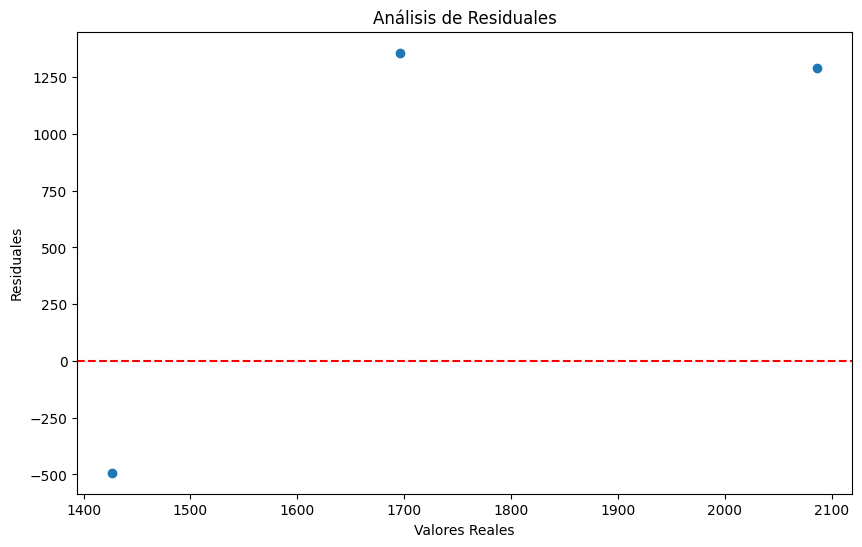

In [19]:
#Analizing the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Residuales')
plt.title('Análisis de Residuales')
plt.show()

In [22]:
##Cross validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Validación Cruzada (R² Scores):", scores)
print("R² Score Promedio:", scores.mean())

Validación Cruzada (R² Scores): [-9.38579156e-01 -4.27404405e+00 -1.10331538e+03 -1.01576082e+02
 -2.78629157e+01]
R² Score Promedio: -247.5934005654686


In [ ]:
##The values were bad so i decided to do a ridge regression looking for better results

#Creating a pipeline with standarization and Ridge regression
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))

#Training the model
ridge_model.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluating model again
print("R² Score (Ridge):", r2_score(y_test, y_pred_ridge))
print("Mean Squared Error (MSE, Ridge):", mean_squared_error(y_test, y_pred_ridge))
print("Root Mean Squared Error (RMSE, Ridge):", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Mean Absolute Error (MAE, Ridge):", mean_absolute_error(y_test, y_pred_ridge))


In [33]:
# Create a StandardScaler object to standardize the data
scaler = StandardScaler()

# Standardize the features (X)
X_standardized = scaler.fit_transform(X)

# Training and test sets (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Standard Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the Linear Regression model
print("=== Regresión Lineal Estándar ===")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

#Evaluate the Ridge Regression model
print("\n=== Ridge Regression ===")
print("R² Score (Ridge):", r2_score(y_test, y_pred_ridge))
print("Mean Squared Error (MSE, Ridge):", mean_squared_error(y_test, y_pred_ridge))
print("Root Mean Squared Error (RMSE, Ridge):", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Mean Absolute Error (MAE, Ridge):", mean_absolute_error(y_test, y_pred_ridge))


=== Regresión Lineal Estándar ===
R² Score: -16.056791151220924
Mean Squared Error (MSE): 1248447.1907263969
Root Mean Squared Error (RMSE): 1117.3393355316894
Mean Absolute Error (MAE): 1046.097307232417


NameError: name 'Ridge' is not defined

In [34]:
# Instantiate a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("=== Random Forest ===")
print("R² Score (Random Forest):", r2_score(y_test, y_pred_rf))
print("Mean Squared Error (MSE, Random Forest):", mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error (RMSE, Random Forest):", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Mean Absolute Error (MAE, Random Forest):", mean_absolute_error(y_test, y_pred_rf))

=== Random Forest ===
R² Score (Random Forest): 0.9030670271517529
Mean Squared Error (MSE, Random Forest): 7094.8689333333305
Root Mean Squared Error (RMSE, Random Forest): 84.23104494978874
Mean Absolute Error (MAE, Random Forest): 74.75333333333333


In [27]:
from sklearn.model_selection import GridSearchCV

# Hiperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search to optimize the Random Forest
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Evaluate
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

print("=== Mejor Modelo Random Forest ===")
print("R² Score (Random Forest):", r2_score(y_test, y_pred_best_rf))
print("Mean Squared Error (MSE, Random Forest):", mean_squared_error(y_test, y_pred_best_rf))
print("Root Mean Squared Error (RMSE, Random Forest):", np.sqrt(mean_squared_error(y_test, y_pred_best_rf)))
print("Mean Absolute Error (MAE, Random Forest):", mean_absolute_error(y_test, y_pred_best_rf))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
=== Mejor Modelo Random Forest ===
R² Score (Random Forest): 0.9236197715504184
Mean Squared Error (MSE, Random Forest): 5590.540494370475
Root Mean Squared Error (RMSE, Random Forest): 74.76991704135077
Mean Absolute Error (MAE, Random Forest): 69.38500727513224


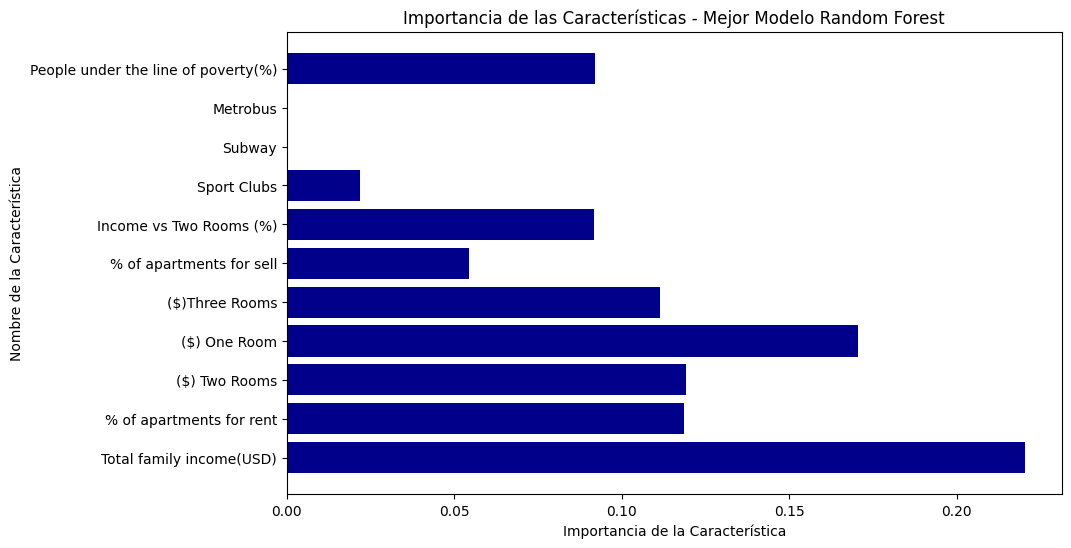

In [28]:
# Extract the feature importances from the best model
feature_importances = best_rf_model.feature_importances_
feature_names = X.columns

# Viz
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='darkblue')
plt.xlabel('Importancia de la Característica')
plt.ylabel('Nombre de la Característica')
plt.title('Importancia de las Características - Mejor Modelo Random Forest')
plt.show()

In [30]:
df2.to_csv('C://Users//chan_//OneDrive//Escritorio//PROJECTOS//Proyecto_M2Caba//CABAM2ValueAnalysis_prepared.csv', index=False)

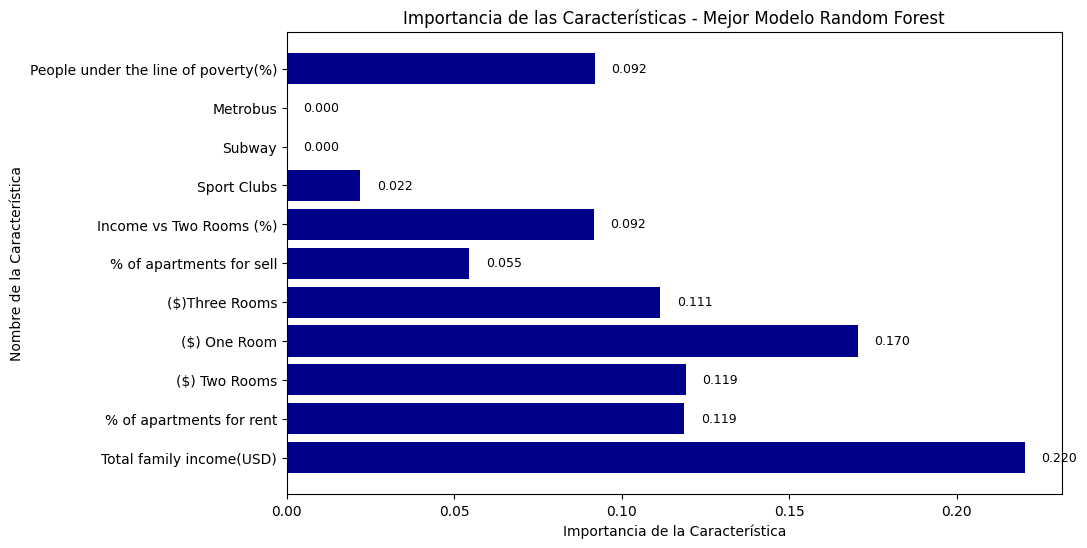

In [31]:
# Just want to a version with the exact values.
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_names, feature_importances, color='darkblue')
plt.xlabel('Importancia de la Característica')
plt.ylabel('Nombre de la Característica')
plt.title('Importancia de las Características - Mejor Modelo Random Forest')

for bar in bars:
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.3f}',  # Esto muestra el valor con tres decimales
             va='center', fontsize=9, color='black')

plt.show()